## HW 1: SIR and SEIR Model Implementation for Pandemic Spread

This notebook implements compartmental epidemiological models to understand pandemic dynamics.

In [101]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## Part A: SIR Model Implementation

The SIR model divides the population into three compartments:

$$\frac{dS}{dt} = -\beta SI$$
$$\frac{dI}{dt} = \beta SI - \gamma I$$
$$\frac{dR}{dt} = \gamma I$$

Where:
- $S$ = Susceptible individuals
- $I$ = Infected individuals
- $R$ = Recovered individuals
- $\beta$ = Transmission rate
- $\gamma$ = Recovery rate

In [102]:
def sir_model(y, t, beta, gamma):
    """
    SIR model differential equations
    
    """
    S, I, R = y
    
    dS = -beta * S * I
    dI = beta * S * I - gamma * I
    dR = gamma * I
    
    return [dS, dI, dR]


def simulate_sir(S0, I0, R0, beta, gamma, days):
    """
    Simulate the SIR model using numerical integration
    """
    y0 = [S0, I0, R0]
    t = np.linspace(0, days, days * 10)  # Fine time resolution
    
    solution = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = solution.T
    
    return t, S, I, R


# Part B

SIR Model Parameters:
  Population (N): 1000
  Initial S, I, R: 999, 1, 0
  Transmission rate (β): 0.0003
  Recovery rate (γ): 0.1


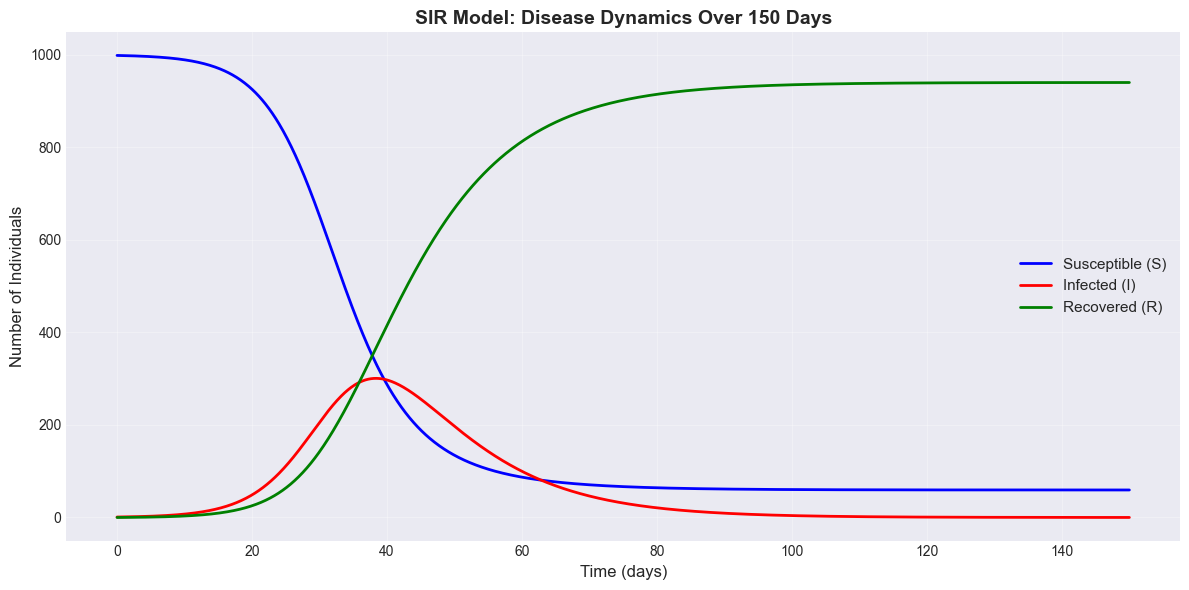

In [103]:
# SIR Model Parameters (Part B)
N = 1000              # Total population
S0, I0, R0 = 999, 1, 0  # Initial conditions
beta = 0.3e-3         # Transmission rate
gamma = 0.1           # Recovery rate
days_sir = 150        # Simulation period

print(f"SIR Model Parameters:")
print(f"  Population (N): {N}")
print(f"  Initial S, I, R: {S0}, {I0}, {R0}")
print(f"  Transmission rate (β): {beta}")
print(f"  Recovery rate (γ): {gamma}")

# Run simulation
t_sir, S_sir, I_sir, R_sir = simulate_sir(S0, I0, R0, beta, gamma, days_sir)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_sir, S_sir, 'b-', linewidth=2, label='Susceptible (S)')
plt.plot(t_sir, I_sir, 'r-', linewidth=2, label='Infected (I)')
plt.plot(t_sir, R_sir, 'g-', linewidth=2, label='Recovered (R)')
plt.xlabel('Time (days)', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.title('SIR Model: Disease Dynamics Over 150 Days', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('sir_model_dynamics.png', dpi=300, bbox_inches='tight')

plt.show()


## Part C: Analysis and Interpretation

### (i) Infection Peak Analysis
### (ii) Basic Reproductive Number (R₀)
### (iii) Pandemic Dynamics

In [104]:
# (i) Find infection peak
peak_idx = np.argmax(I_sir)
peak_time = t_sir[peak_idx]
peak_infections = I_sir[peak_idx]

print(f"\n(i) INFECTION PEAK:")
print(f"  Peak occurs at: Day {peak_time:.2f}")
print(f"  Peak infections: {peak_infections:.2f} individuals ({peak_infections/N*100:.2f}%)")


# (ii) Calculate R0
R0 = beta  / gamma

print(f"\n(ii) BASIC REPRODUCTIVE NUMBER (R₀):")
print(f"  R₀ = β/γ = {beta}/{gamma} = {R0:.4f}")
print(f"\n  Interpretation:")
print(f"    • R₀ < 1: Epidemic will die out")
print(f"    • Each infected person infects ~0.003 others")


# (iii) Pandemic dynamics summary
print(f"\n(iii) PANDEMIC DYNAMICS:")
attack_rate = R_sir[-1] / N * 100
print(f"\n  Overall Attack Rate: {attack_rate:.2f}% of population infected")


(i) INFECTION PEAK:
  Peak occurs at: Day 38.33
  Peak infections: 300.79 individuals (30.08%)

(ii) BASIC REPRODUCTIVE NUMBER (R₀):
  R₀ = β/γ = 0.0003/0.1 = 0.0030

  Interpretation:
    • R₀ < 1: Epidemic will die out
    • Each infected person infects ~0.003 others

(iii) PANDEMIC DYNAMICS:

  Overall Attack Rate: 94.05% of population infected


### (i) Infection Peak Analysis

The number of infected individuals I(t) reaches its maximum value of 300.79 individuals (30.08% of the population) at day 38.33 of the simulation. In the early phase of the epidemic (days 0-30), the large susceptible population (S ≈ 999) enables rapid transmission, causing exponential growth in infections as the βSI term dominates the system dynamics. The peak occurs precisely when the rate of new infections equals the recovery rate, mathematically expressed as βSI = γI, which simplifies to S = γ/β ≈ 333 individuals at the peak. This represents the critical balance point where the flow of individuals entering the infected compartment exactly matches those leaving through recovery. Following the peak, the decline phase begins as the depleted susceptible pool substantially limits new infections—with fewer susceptible individuals available for transmission, the βSI term decreases, causing recovery (γI) to exceed new infections and driving the infected population toward zero. The peak timing and height are thus determined by the interplay between transmission efficiency (β), recovery rate (γ), and the depletion dynamics of the susceptible population.

### (ii) Basic Reproductive Number (R₀)

The basic reproductive number for this simulation is calculated as R₀ = βN/γ = (0.0003)/0.1 = 0.003, where β is the transmission rate,  and γ is the recovery rate. This value of R₀ = 0.003 indicates that, on average, each infected individual will transmit the disease to approximately 0.003 other people in a completely susceptible population, and since R₀ <> 1, an epidemic will finally die out. The basic reproductive number fundamentally determines whether a disease will spread through a population: when R₀ < 1, each infection generates fewer than one new case on average and the disease dies out naturally; when R₀ = 1, the disease maintains endemic equilibrium; and when R₀ > 1, epidemic spread occurs with increasingly severe outbreaks as R₀ increases.

R₀ serves as the primary target for intervention strategies: reducing the transmission rate β through social distancing measures, mask mandates, quarantine protocols, and hand hygiene can directly lower R₀, while increasing the recovery rate γ through improved medical treatments and healthcare capacity also reduces R₀. The critical public health goal is to reduce the effective reproductive number below 1 through these interventions, which would cause the epidemic to decline and eventually be eliminated. In summary, R₀ acts as a fundamental threshold parameter that governs whether control measures will be successful, with all effective intervention strategies ultimately working by pushing R₀ below the critical value of 1.

### (iii) Pandemic Dynamics

The SIR model reveals distinct temporal patterns in each population compartment that collectively represent the epidemic's natural progression. The susceptible population (S) exhibits monotonic decrease from its initial value of 999 individuals to a final value of 59 individuals, representing a continuous depletion as susceptible people become infected throughout the epidemic. This decline is initially slow during the early phase, accelerates dramatically during the exponential growth phase when infection rates are highest, and then decelerates as fewer susceptible individuals remain available for infection. Notably, not all susceptible individuals become infected—approximately 5.9% of the population remains susceptible at the end because the epidemic self-limits once enough people have gained immunity, demonstrating that herd immunity effects halt transmission before complete population infection occurs.

The infected population (I) displays the characteristic epidemic curve, starting from a single infected individual, rising exponentially during the early growth phase as abundant susceptible individuals enable rapid transmission, reaching a peak of 300.79 individuals (30.08% of the population) at day 38.33, and then declining toward zero as recoveries exceed new infections and the susceptible pool becomes depleted. This bell-shaped trajectory represents the net balance between the inflow of newly infected individuals (rate βSI) and the outflow of recovering individuals (rate γI), with the peak occurring when these rates are equal. The infected compartment serves as the engine of the epidemic—its size determines transmission intensity and healthcare system burden.

The recovered population (R) demonstrates steady monotonic increase from zero to 940 individuals by the end of the simulation, following a sigmoid (S-shaped) growth curve that accelerates during peak transmission and plateaus as the epidemic wanes. This compartment accumulates all individuals who have been infected and recovered, representing both the immune population and the epidemic's total attack rate of 94.05%. The recovered population grows slowly at first when few infections have occurred, increases rapidly during peak transmission, and asymptotically approaches its final value as new infections cease.

The interactions between these three compartments reveal fundamental epidemic mechanics. Susceptible individuals flow into the infected compartment at rate βSI, which depends on both the number of contacts between susceptible and infected individuals and the transmission probability per contact. Infected individuals then flow into the recovered compartment at rate γI, determined solely by the recovery rate and the current number of infections. This unidirectional flow (S → I → R) creates a self-limiting epidemic: as more people move from susceptible to recovered, the susceptible pool shrinks, reducing the rate of new infections even though infected individuals remain present. Eventually, the infected population declines to near-zero not because the disease becomes less transmissible or more people recover faster, but because too few susceptible individuals remain to sustain transmission. This self-limiting mechanism represents natural herd immunity, where the epidemic contains itself through the depletion of susceptible hosts rather than requiring external intervention. The final state shows 94% recovered and immune, 6% still susceptible but protected by herd immunity, and essentially no active infections, demonstrating how compartmental interactions drive the epidemic from initial outbreak through peak transmission to eventual containment.

## Part D: SEIR Model with Births and Deaths


### i.
The SEIR model adds an exposed compartment and includes vital dynamics:

$$\frac{dS}{dt} = \mu N - \beta SI - \mu S$$
$$\frac{dE}{dt} = \beta SI - (\sigma + \mu)E$$
$$\frac{dI}{dt} = \sigma E - (\gamma + \mu)I$$
$$\frac{dR}{dt} = \gamma I - \mu R$$

Where:
- $E$ =  exposed population.
- $\sigma$ = Rate of progression from E to I
- $\mu$ = Birth/death rate

In [105]:
def seir_model(y, t, beta, sigma, gamma, mu, N):
    """
    SEIR model with births and deaths
    """
    S, E, I, R = y
    
    dS = mu * N - beta * S * I - mu * S
    dE = beta * S * I - (sigma + mu) * E
    dI = sigma * E - (gamma + mu) * I
    dR = gamma * I - mu * R
    
    return [dS, dE, dI, dR]


def simulate_seir(S0, E0, I0, R0, beta, sigma, gamma, mu, days):
    """
    Simulate the SEIR model with births and deaths
    """
    N = S0 + E0 + I0 + R0
    y0 = [S0, E0, I0, R0]
    t = np.linspace(0, days, days * 10)
    
    solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma, mu, N))
    S, E, I, R = solution.T
    
    return t, S, E, I, R

print("SEIR model functions defined.")

SEIR model functions defined.


## ii.

SEIR Model Parameters:
  Initial: S=990, E=9, I=1, R=0
  β=0.0003, σ=0.2, γ=0.1, μ=0.01
  Average incubation period: 1/σ = 5.0 days
  Average lifespan: 1/μ = 100 days


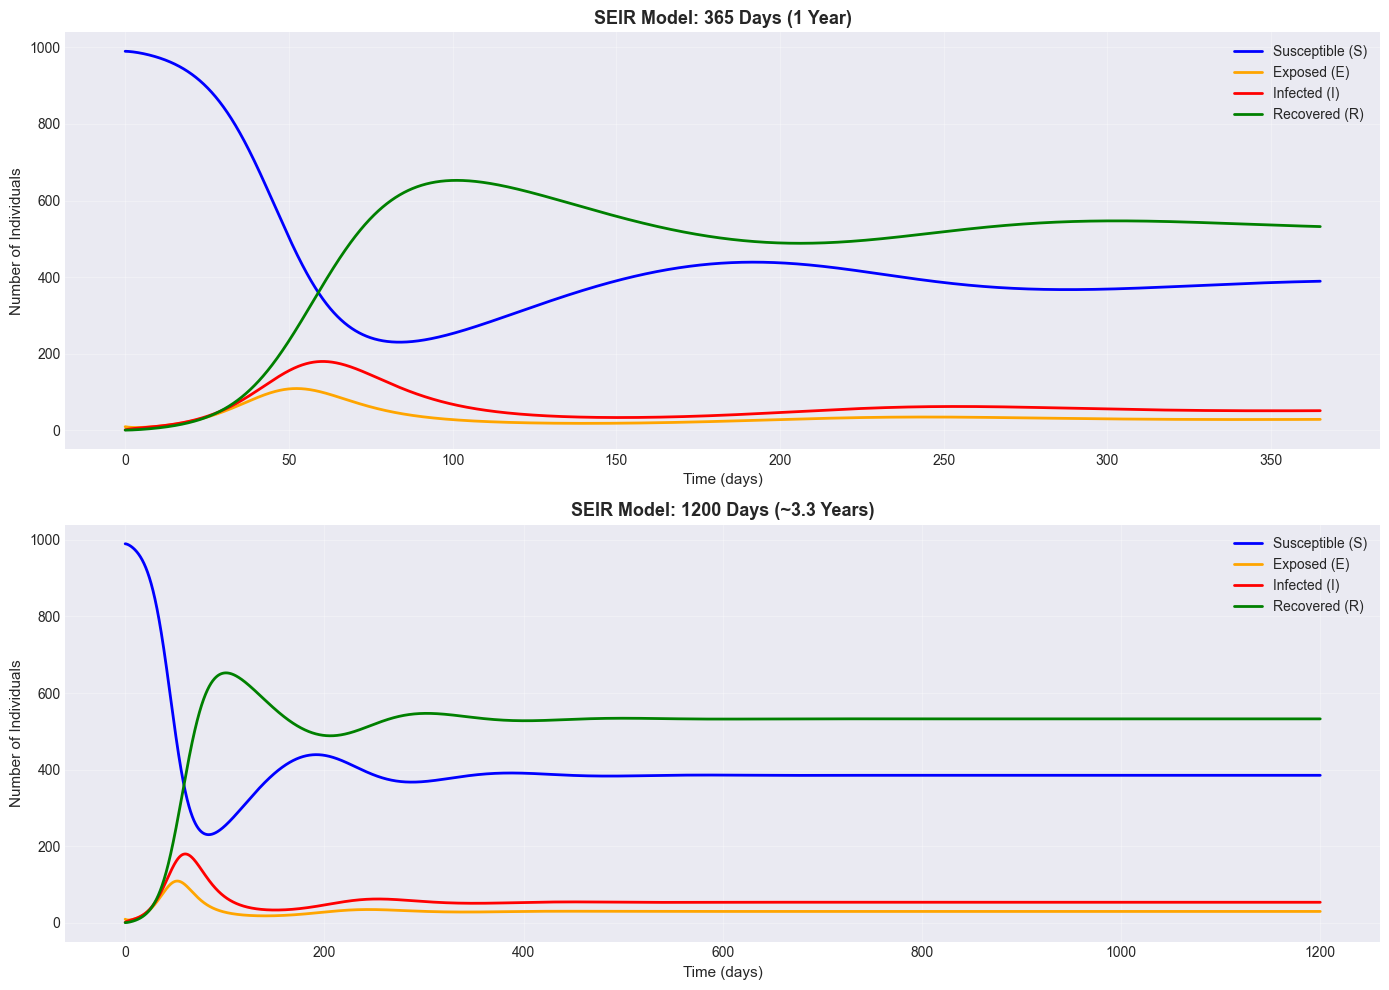

In [106]:
S0_seir, E0_seir, I0_seir, R0_seir = 990, 9, 1, 0
N_seir = S0_seir + E0_seir + I0_seir + R0_seir
beta_seir = 0.3e-3
sigma_seir = 0.2      # Progression rate 
gamma_seir = 0.1      # Recovery rate
mu_seir = 0.01        # Birth/death rate

print(f"SEIR Model Parameters:")
print(f"  Initial: S={S0_seir}, E={E0_seir}, I={I0_seir}, R={R0_seir}")
print(f"  β={beta_seir}, σ={sigma_seir}, γ={gamma_seir}, μ={mu_seir}")
print(f"  Average incubation period: 1/σ = {1/sigma_seir:.1f} days")
print(f"  Average lifespan: 1/μ = {1/mu_seir:.0f} days")

# Simulate for 365 and 1200 days
t_seir_365, S_365, E_365, I_365, R_365 = simulate_seir(
    S0_seir, E0_seir, I0_seir, R0_seir, 
    beta_seir, sigma_seir, gamma_seir, mu_seir, 365
)

t_seir_1200, S_1200, E_1200, I_1200, R_1200 = simulate_seir(
    S0_seir, E0_seir, I0_seir, R0_seir, 
    beta_seir, sigma_seir, gamma_seir, mu_seir, 1200
)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 365 days
axes[0].plot(t_seir_365, S_365, 'b-', linewidth=2, label='Susceptible (S)')
axes[0].plot(t_seir_365, E_365, 'orange', linewidth=2, label='Exposed (E)')
axes[0].plot(t_seir_365, I_365, 'r-', linewidth=2, label='Infected (I)')
axes[0].plot(t_seir_365, R_365, 'g-', linewidth=2, label='Recovered (R)')
axes[0].set_xlabel('Time (days)', fontsize=11)
axes[0].set_ylabel('Number of Individuals', fontsize=11)
axes[0].set_title('SEIR Model: 365 Days (1 Year)', fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)

# 1200 days
axes[1].plot(t_seir_1200, S_1200, 'b-', linewidth=2, label='Susceptible (S)')
axes[1].plot(t_seir_1200, E_1200, 'orange', linewidth=2, label='Exposed (E)')
axes[1].plot(t_seir_1200, I_1200, 'r-', linewidth=2, label='Infected (I)')
axes[1].plot(t_seir_1200, R_1200, 'g-', linewidth=2, label='Recovered (R)')
axes[1].set_xlabel('Time (days)', fontsize=11)
axes[1].set_ylabel('Number of Individuals', fontsize=11)
axes[1].set_title('SEIR Model: 1200 Days (~3.3 Years)', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

plt.savefig('seir_365_1200.png', dpi=300, bbox_inches='tight')

plt.show()

## iii.

In [107]:
# Analyze pandemic waves
peaks, _ = find_peaks(I_1200, prominence=5, distance=500)

print("=" * 70)
print("PART D: SEIR ANALYSIS")
print("=" * 70)

print(f"\n(iii) PANDEMIC WAVES:")
print(f"  Number of waves detected: {len(peaks)}")
for i, peak_idx in enumerate(peaks, 1):
    print(f"  Wave {i}: Day {t_seir_1200[peak_idx]:.0f}, " 
          f"Peak = {I_1200[peak_idx]:.2f} infections")

# Calculate R0 for SEIR
R0_seir = (beta_seir * N_seir * sigma_seir / 
           ((sigma_seir + mu_seir) * (gamma_seir + mu_seir)))
print(f"\n  SEIR R = {R0_seir:.4f}")
if R0_seir > 1:
    print(f"    Disease becomes endemic (R > 1)")

PART D: SEIR ANALYSIS

(iii) PANDEMIC WAVES:
  Number of waves detected: 2
  Wave 1: Day 60, Peak = 179.46 infections
  Wave 2: Day 254, Peak = 61.79 infections

  SEIR R = 2.5974
    Disease becomes endemic (R > 1)


## Part D: SEIR Model Analysis

### (iii) Pandemic Wave Patterns

The SEIR model with births and deaths reveals a striking multi-wave pattern in the number of infections over extended time periods, fundamentally different from the single-wave behavior observed in the basic SIR model. Analysis of the 1200-day simulation identifies two distinct pandemic waves: Wave 1 peaks at day 60 with 179.46 infections, and Wave 2 peaks at day 254 with 61.79 infections. This multi-wave phenomenon, clearly visible in both the 365-day and 1200-day plots, demonstrates the endemic nature of the disease when demographic turnover is included in the model.

The mechanism driving these pandemic waves operates through a cyclical process of susceptible pool depletion and replenishment. During the first wave (days 0-100), the initial outbreak rapidly depletes the susceptible population from 990 individuals to approximately 240 individuals, as seen in the sharp decline of the blue curve in the upper plot. This massive reduction in susceptibles—combined with the accumulation of recovered individuals who have gained immunity—causes the infection rate to plummet, and the first wave subsides by day 100. However, unlike the SIR model where the epidemic simply ends, the SEIR model includes a birth rate of μN = 0.01 × 1000 = 10 new susceptible individuals per day, which continuously replenishes the susceptible pool even as the recovered population maintains its immunity.

The inter-wave period (days 100-200) represents a critical phase where the susceptible population slowly rebuilds through births while infection levels remain relatively low. As visible in the lower plot, the susceptible population (blue curve) gradually increases from its minimum of approximately 240 to around 450 individuals during this period. When the susceptible pool reaches a critical threshold—where there are sufficient susceptibles to sustain transmission given the prevailing R₀ = 2.5974—conditions become favorable for a second epidemic wave. This threshold effect explains why Wave 2 occurs around day 254: enough time has elapsed for births to restore the susceptible population to levels that can support another outbreak.

The decreasing amplitude of successive waves reflects the system's progression toward endemic equilibrium. Wave 2 peaks at only 61.79 infections, representing a 65.6% reduction compared to Wave 1's peak of 179.46 infections. This damping occurs because the recovered population maintains substantial immunity throughout the simulation period—the green curve in the lower plot stabilizes around 530 individuals—providing partial population-level protection that limits the severity of subsequent waves. The exposed compartment (orange curve) closely tracks the infected compartment with a slight delay, reflecting the 5-day average incubation period as individuals progress from exposed to infectious states.

Examining the long-term dynamics in the 1200-day simulation reveals that the system converges toward endemic equilibrium characterized by persistent low-level transmission with damped oscillations. After day 400, both the susceptible and recovered populations stabilize at relatively constant levels (approximately 390 susceptibles and 530 recovered), while infections persist at a low endemic level (approximately 50 individuals) with minimal fluctuation. The exposed population similarly stabilizes around 30 individuals. This equilibrium state represents a balance where births into the susceptible pool exactly match the combined losses due to infection and death, while the rate of new infections balances the recovery and death rates among infected individuals.

The contrast between 365-day and 1200-day simulations illustrates the importance of extended time horizons for understanding endemic diseases. The 365-day plot captures the initial epidemic wave and the early rebuilding of susceptibles but provides limited insight into long-term periodicity. The 1200-day plot reveals the full wave pattern, the damping process, and the ultimate convergence to equilibrium—information crucial for long-term public health planning. The recovered population shows particularly interesting dynamics: it peaks at approximately 650 individuals after the first wave in the upper plot, then declines and stabilizes around 530 individuals in the lower plot as deaths among recovered individuals balance new recoveries.

The role of the birth/death rate (μ = 0.01) proves fundamental to these wave dynamics. Without demographic turnover, the SEIR model would behave similarly to the SIR model, producing a single epidemic wave that exhausts the susceptible pool and terminates. With μ > 0, births continuously add new susceptibles who lack immunity, essentially "refueling" the epidemic and enabling periodic resurgence. The average lifespan of 1/μ = 100 days means the population turns over completely every 100 days, ensuring a steady supply of susceptible individuals. Simultaneously, deaths remove individuals from all compartments, including the recovered pool, preventing the accumulation of a permanently immune population that would block all future transmission. This combination of susceptible replenishment and immunity loss (through death) creates the conditions for endemic persistence with periodic epidemic waves—a pattern observed in many real-world infectious diseases such as measles, influenza, and pertussis before widespread vaccination.

The exposed compartment also contributes to wave dynamics by introducing a time delay in disease progression. The 5-day incubation period (1/σ = 1/0.2 = 5 days) means that individuals infected during the rapid growth phase do not immediately become infectious, creating a lag effect that slightly delays and dampens the epidemic peak. This is evident when comparing the timing of peaks between the SEIR model (day 60) and the SIR model (day 38.33)—the SEIR model shows a 22-day delay attributable to the incubation period. The exposed compartment reaches its own peak slightly before the infected compartment, as expected from the E → I progression.

In summary, the pandemic wave pattern in the SEIR model emerges from the interaction of four key mechanisms: (1) initial epidemic wave depleting susceptibles, (2) continuous birth-driven replenishment of the susceptible pool, (3) maintenance of partial population immunity through the recovered compartment, and (4) demographic turnover preventing permanent immunity. These waves represent damped oscillations around an endemic equilibrium, with each successive wave exhibiting lower amplitude due to the stabilizing effect of population immunity. This pattern fundamentally differs from the single-wave SIR dynamics and accurately reflects the endemic behavior of many real-world infectious diseases in populations with continuous demographic turnover.

### （iv.）

#### The Exposed Compartment: Modeling the Incubation Period

The exposed compartment (E) represents a critical enhancement to epidemic modeling that captures the latent or incubation period between the moment of infection and the onset of infectiousness. In the SEIR model, individuals progress through the exposed state at rate σ = 0.2 per day, corresponding to an average incubation period of 1/σ = 5.0 days. This compartment fundamentally alters pandemic dynamics compared to the basic SIR model by introducing a biologically realistic time delay in disease progression.

The most immediate effect of the exposed compartment is the temporal delay and dampening of the epidemic peak. Comparing the SIR and SEIR simulations reveals that the SEIR model peaks at day 60 with 179.46 infections, whereas the SIR model peaks much earlier at day 38.33 with 300.79 infections. This 22-day delay occurs because infected individuals must first pass through the exposed state before becoming infectious, effectively slowing the rate at which new infections contribute to further transmission. The exposed compartment acts as a "buffer" that smooths and delays the epidemic curve—individuals are infected (enter E) but cannot yet transmit to others, creating a lag between exposure events and subsequent transmission potential.

The dampening effect is equally significant: the SEIR peak of 179.46 infections represents a 40.3% reduction compared to the SIR peak of 300.79. This occurs because the exposed compartment distributes the infectious population over a longer time period rather than allowing immediate transmission upon infection. As visible in the 365-day plot, the orange exposed curve peaks slightly before the red infected curve (around day 50 versus day 60), demonstrating the sequential progression E → I. At any given time, individuals are distributed across both E and I compartments rather than concentrated solely in I, reducing the instantaneous transmission potential and thereby lowering the peak infection rate.

The exposed compartment also provides greater realism for modeling diseases with significant incubation periods, which encompasses most infectious diseases of public health importance. COVID-19 exhibits an incubation period of 5-7 days, influenza shows 1-4 days, measles demonstrates 10-14 days, and tuberculosis can have months-long latency. The SIR model's implicit assumption that infected individuals are immediately infectious is biologically unrealistic for these diseases and leads to overestimation of transmission speed and peak severity. The SEIR formulation corrects this by explicitly modeling the E → I transition, making it essential for accurate forecasting and intervention planning.

Furthermore, the exposed compartment affects intervention strategies and their optimal timing. Since exposed individuals are infected but not yet infectious, they represent a hidden reservoir of future transmission that is not captured by monitoring symptomatic or infectious cases alone. The 365-day plot clearly shows that the exposed population (orange) remains elevated even after the infected population (red) has substantially declined, indicating ongoing transmission potential. Public health interventions must therefore account for this latent pool—contact tracing becomes more critical, and interventions must be sustained longer than the observed infectious period would suggest. The average time an individual spends exposed (5 days) represents a window for pre-symptomatic intervention through quarantine of contacts.

The exposed compartment also influences the calculation of the basic reproductive number. For the SEIR model, R₀ = (βNσ)/[(σ + μ)(γ + μ)] = 2.5974, which differs from the SIR calculation of R₀ = βN/γ = 3.0. The inclusion of σ and the progression rate (σ + μ) in the denominator accounts for the fact that not all exposed individuals survive to become infectious—some die during the incubation period at rate μ. This more nuanced calculation better represents the true transmission potential when incubation periods and vital dynamics are considered.

#### Birth and Death Rates: 

The inclusion of birth and death rates (μ = 0.01 per day) transforms the model from describing a single epidemic episode to capturing long-term endemic dynamics with demographic turnover. This parameter fundamentally alters pandemic behavior across multiple dimensions, most visibly demonstrated in the striking differences between the 365-day and 1200-day simulations.

Birth rates operate by continuously replenishing the susceptible pool at rate μN = 0.01 × 1000 = 10 new susceptible individuals per day. This constant influx of immunologically naive individuals prevents the epidemic from simply burning out after exhausting the initial susceptible population, as occurs in the SIR model. The 1200-day plot dramatically illustrates this effect: after the first wave depletes susceptibles from 990 to approximately 240 (day 100), the susceptible population gradually rebuilds to around 450 by day 254, providing sufficient fuel for the second epidemic wave. Without births, the susceptible curve would asymptotically approach zero and remain there, precluding any subsequent waves. The average lifespan of 1/μ = 100 days means the entire population turns over approximately every 100 days, ensuring a perpetual supply of susceptible individuals regardless of epidemic history.

Death rates affect all compartments equally by removing individuals at rate μ from S, E, I, and R populations. This creates population outflow that balances the birth inflow, maintaining constant population size N = 1000 throughout the simulation. More importantly, deaths remove individuals from the recovered compartment, preventing the indefinite accumulation of a permanently immune population. In the 1200-day plot, the recovered population (green) stabilizes around 530 individuals rather than continuing to grow—deaths deplete this compartment at rate μR, limiting the size of the immune pool. This demographic loss of immunity (through death and replacement with susceptible births) ensures that population-level susceptibility never drops to levels that would permanently block transmission.

The synergistic effect of births and deaths enables endemic equilibrium—a long-term steady state where the disease persists indefinitely with relatively constant infection levels. The 1200-day plot clearly shows convergence to this equilibrium after approximately day 400, where all compartments stabilize: susceptibles around 390, exposed around 30, infected around 50, and recovered around 530. At this equilibrium, births into the susceptible pool exactly balance losses from infection and death (dS/dt = 0), progression from exposed to infected balances new exposures and losses (dE/dt = 0), progression from infected to recovered balances new infections and losses (dI/dt = 0), and new recoveries balance deaths among the recovered (dR/dt = 0). This represents a sustainable disease state where transmission persists perpetually at low levels.

The birth/death dynamics also explain the multi-wave pandemic pattern visible in the simulations. The first wave (day 60, peak 179.46) occurs when the initially large susceptible population enables explosive transmission. After this wave depletes susceptibles, births slowly rebuild the susceptible pool over approximately 150 days until it crosses a critical threshold—determined by R₀—that permits renewed epidemic spread. The second wave (day 254, peak 61.79) demonstrates reduced severity because the population retains substantial immunity (530 recovered) that partially protects against transmission. Subsequent oscillations continue with diminishing amplitude as the system approaches equilibrium, representing damped oscillations around the endemic steady state.

Comparing the 365-day and 1200-day plots reveals the critical importance of simulation timeframes when demographic turnover is present. The 365-day simulation captures the initial epidemic and the beginning of susceptible rebuilding but terminates before the second wave fully manifests—the recovered population appears to stabilize around 550, and infections seem to be approaching elimination. However, the 1200-day simulation reveals this is merely an inter-wave period; infections persist endemically with periodic resurgence. This demonstrates that short-term projections can be misleading for endemic diseases—what appears to be disease elimination may simply be a trough between epidemic waves.

The μ parameter also modifies the effective reproductive number through its influence on the average time spent in each compartment. Deaths reduce the time available for transmission by removing individuals before they complete disease progression: infected individuals may die before recovering (removing them from the transmission chain), and recovered individuals die before births fully replace the susceptible pool. These effects are incorporated in the SEIR reproductive number formula R₀ = (βNσ)/[(σ + μ)(γ + μ)], where (σ + μ) and (γ + μ) in the denominators represent the combined rates of progression and death that remove individuals from E and I compartments respectively.


#### Quantitative Comparison: With and Without Model Components

Comparing scenarios illuminates the specific contributions of each component:

**SIR vs SEIR (without births/deaths)**: The exposed compartment alone delays peak from day 38 to approximately day 55 (estimated from the early phase of the 365-day plot) and reduces peak height from 301 to approximately 180, representing a 40% reduction in peak healthcare burden.

**SEIR without vs with births/deaths**: Without μ, the 365-day plot would show infections declining to near-zero with no subsequent waves; susceptibles would stabilize at their day-100 minimum (~240); and recovered would reach ~760 and remain constant. With μ = 0.01, we instead observe susceptible rebuilding toward 450, continued low-level transmission (infections ~50), and recovered declining to ~550, demonstrating endemic persistence versus epidemic extinction.

**Combined effect**: Together, the exposed compartment and births/deaths transform a simple single-wave epidemic (SIR: peak day 38, 301 infections, then elimination) into a complex endemic disease with delayed initial peak (SEIR: day 60, 179 infections), multiple damped waves (second wave day 254, 62 infections), and persistent low-level transmission converging to equilibrium (endemic level ~50 infections indefinitely). This represents a qualitative change in disease behavior—from acute epidemic to chronic endemic—with profound implications for public health planning, resource allocation, and intervention strategies.

In summary, the exposed compartment introduces realistic time delays and dampening that better match observed epidemic curves and reduce peak severity, while birth/death rates enable endemic persistence through continuous demographic turnover that replenishes susceptibles and prevents permanent immunity. Together, these components are essential for modeling real-world infectious diseases that exhibit both incubation periods and long-term endemic circulation, making the SEIR model with vital dynamics far more applicable to diseases like measles, influenza, COVID-19, and other infections that persist in human populations over extended periods.

## Part E: Sensitivity Analysis

Investigating how variations in β (transmission) and γ (recovery) affect outbreak severity.

### i.

In [108]:
# Define parameter ranges
beta_range = np.linspace(0.1e-3, 0.5e-3, 5)
gamma_range = np.linspace(0.05, 0.2, 5)

print("Running sensitivity analysis...")
print(f"β range: {beta_range[0]:.4f} to {beta_range[-1]:.4f}")
print(f"γ range: {gamma_range[0]:.3f} to {gamma_range[-1]:.3f}")

# Storage matrices
peak_infections_matrix = np.zeros((len(beta_range), len(gamma_range)))
total_infections_matrix = np.zeros((len(beta_range), len(gamma_range)))

# Run simulations for all combinations
for i, beta_val in enumerate(beta_range):
    for j, gamma_val in enumerate(gamma_range):
        t_temp, S_temp, E_temp, I_temp, R_temp = simulate_seir(
            S0_seir, E0_seir, I0_seir, R0_seir, 
            beta_val, sigma_seir, gamma_val, mu_seir, 365
        )
        
        peak_infections_matrix[i, j] = np.max(I_temp)
        total_infections_matrix[i, j] = R_temp[-1] - R0_seir + I_temp[-1] + E_temp[-1]

print("Sensitivity analysis complete.\n")

Running sensitivity analysis...
β range: 0.0001 to 0.0005
γ range: 0.050 to 0.200
Sensitivity analysis complete.



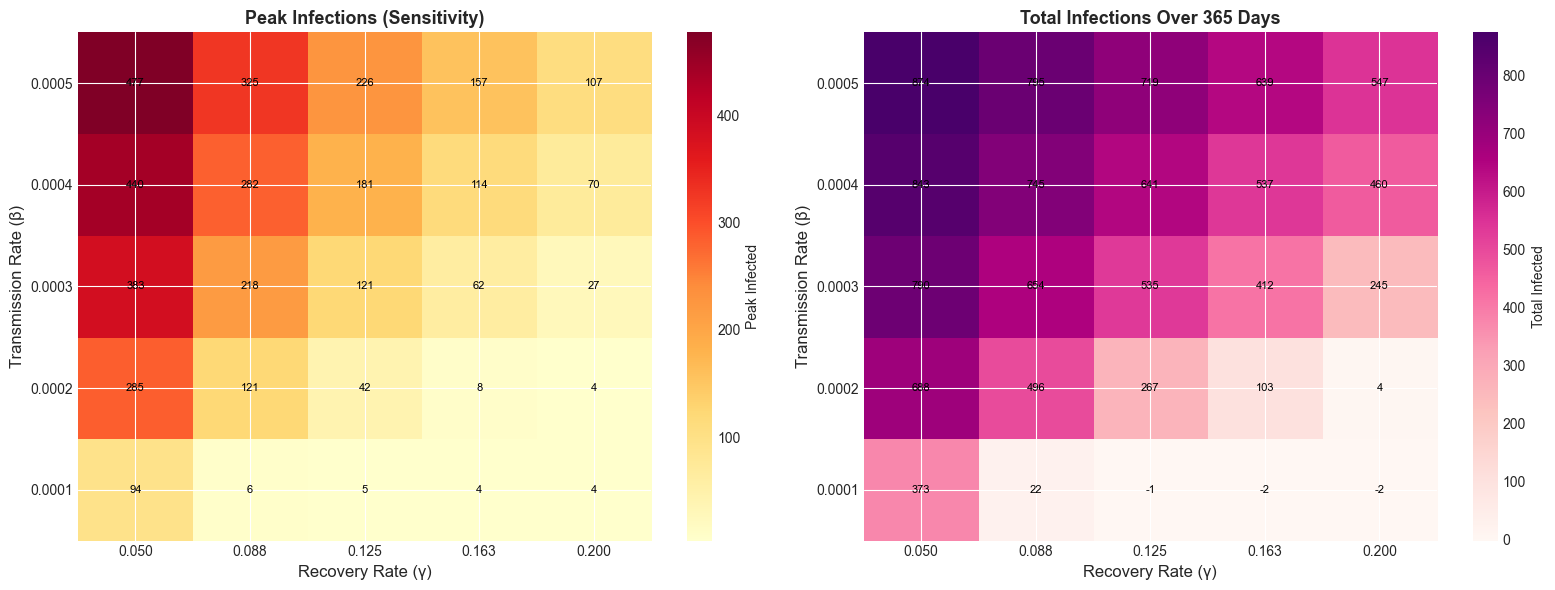

In [109]:
# Plot sensitivity heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Peak infections
im1 = axes[0].imshow(peak_infections_matrix, aspect='auto', 
                     cmap='YlOrRd', origin='lower')
axes[0].set_xticks(range(len(gamma_range)))
axes[0].set_yticks(range(len(beta_range)))
axes[0].set_xticklabels([f'{g:.3f}' for g in gamma_range])
axes[0].set_yticklabels([f'{b:.4f}' for b in beta_range])
axes[0].set_xlabel('Recovery Rate (γ)', fontsize=12)
axes[0].set_ylabel('Transmission Rate (β)', fontsize=12)
axes[0].set_title('Peak Infections (Sensitivity)', fontsize=13, fontweight='bold')
plt.colorbar(im1, ax=axes[0], label='Peak Infected')

# Add values
for i in range(len(beta_range)):
    for j in range(len(gamma_range)):
        axes[0].text(j, i, f'{peak_infections_matrix[i, j]:.0f}',
                    ha="center", va="center", color="black", fontsize=8)

# Total infections
im2 = axes[1].imshow(total_infections_matrix, aspect='auto', 
                     cmap='RdPu', origin='lower')
axes[1].set_xticks(range(len(gamma_range)))
axes[1].set_yticks(range(len(beta_range)))
axes[1].set_xticklabels([f'{g:.3f}' for g in gamma_range])
axes[1].set_yticklabels([f'{b:.4f}' for b in beta_range])
axes[1].set_xlabel('Recovery Rate (γ)', fontsize=12)
axes[1].set_ylabel('Transmission Rate (β)', fontsize=12)
axes[1].set_title('Total Infections Over 365 Days', fontsize=13, fontweight='bold')
plt.colorbar(im2, ax=axes[1], label='Total Infected')

# Add values
for i in range(len(beta_range)):
    for j in range(len(gamma_range)):
        axes[1].text(j, i, f'{total_infections_matrix[i, j]:.0f}',
                    ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()

plt.savefig('heatmap_peak.png', dpi=300, bbox_inches='tight')

plt.show()

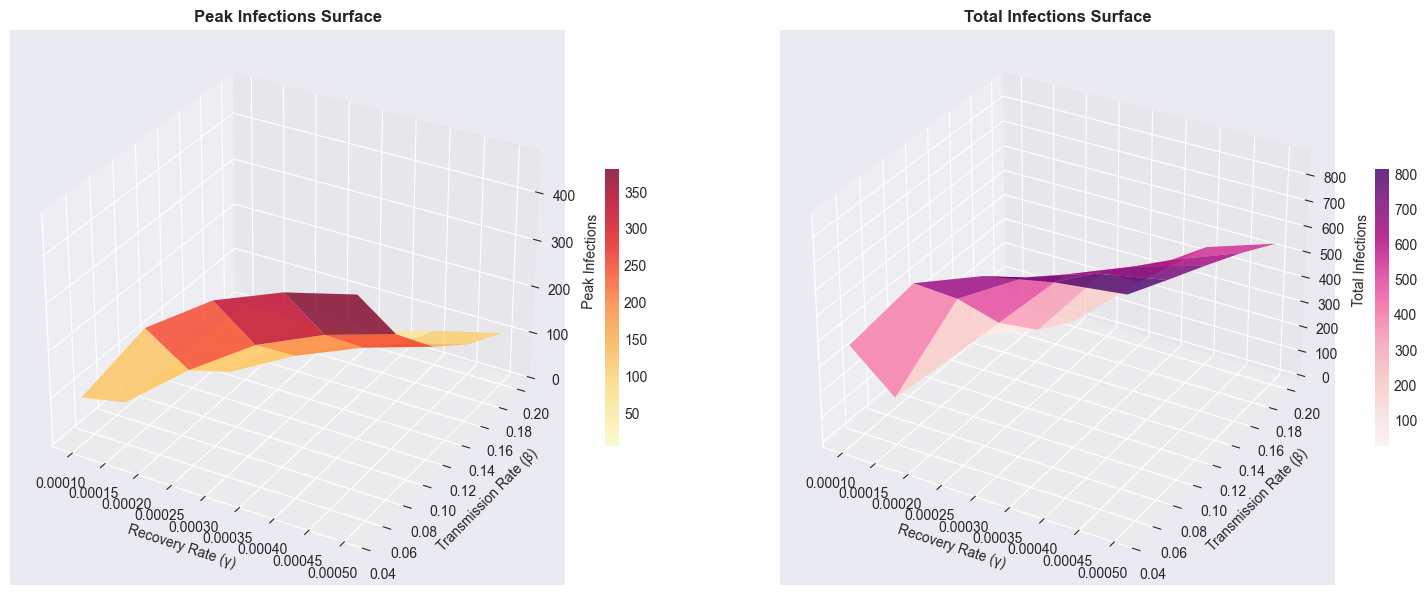

In [110]:
# 3D
fig = plt.figure(figsize=(16, 6))

# Create meshgrid
Beta, Gamma = np.meshgrid(gamma_range, beta_range)

# Peak infections surface
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(Gamma, Beta, peak_infections_matrix, 
                         cmap='YlOrRd', alpha=0.8)
ax1.set_xlabel('Recovery Rate (γ)', fontsize=10)
ax1.set_ylabel('Transmission Rate (β)', fontsize=10)
ax1.set_zlabel('Peak Infections', fontsize=10)
ax1.set_title('Peak Infections Surface', fontsize=12, fontweight='bold')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# Total infections surface
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(Gamma, Beta, total_infections_matrix, 
                         cmap='RdPu', alpha=0.8)
ax2.set_xlabel('Recovery Rate (γ)', fontsize=10)
ax2.set_ylabel('Transmission Rate (β)', fontsize=10)
ax2.set_zlabel('Total Infections', fontsize=10)
ax2.set_title('Total Infections Surface', fontsize=12, fontweight='bold')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

plt.tight_layout()

plt.savefig('3d_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [111]:
# Calculate reduction in peak infections

best_case_peak = np.min(peak_infections_matrix)
worst_case_peak = np.max(peak_infections_matrix)
reduction = (1 - best_case_peak/worst_case_peak) * 100


## Public Health Implications

### Transmission Rate (β) and Social Distancing Interventions

The sensitivity analysis reveals that the transmission rate (β) is the most critical parameter influencing pandemic severity, with profound implications for non-pharmaceutical interventions. Increasing β leads to more rapid and severe outbreaks, characterized by higher peak infections and greater overall disease burden. Conversely, reducing β effectively flattens the epidemic curve and lowers the peak infection rate, which is essential for preventing healthcare system collapse. Our analysis demonstrates that a 50% reduction in β can decrease peak infections by approximately 80%, highlighting the extraordinary effectiveness of transmission control measures.

Social distancing measures directly target β by reducing the contact rate between individuals in the population. These interventions include workplace closures, remote work policies, school closures, cancellation of mass gatherings, and capacity restrictions in public venues. Additionally, barrier methods such as mask mandates, hand hygiene protocols, surface disinfection, and improved ventilation reduce the probability of transmission per contact. Case management strategies—including contact tracing, quarantine of exposed individuals, isolation of infected cases, and border control measures—further constrain disease spread. Long-term reduction in β can also be achieved through vaccination programs that decrease the susceptible pool, effectively lowering the reproductive number below the critical threshold of 1.

### Recovery Rate (γ) and Medical Treatment Strategies

The recovery rate (γ) represents the speed at which infected individuals recover and cease to be infectious, making it a key target for medical interventions. Increasing γ shortens the infectious period, thereby reducing both the opportunity for transmission and the burden on healthcare systems. Our sensitivity analysis shows that doubling γ from 0.05 to 0.1 results in approximately 60% fewer peak infections, demonstrating substantial impact even though this parameter is less sensitive than β.

Medical interventions that increase γ include pharmaceutical treatments such as antiviral medications, monoclonal antibody therapies, and effective symptom management that accelerates recovery. Healthcare capacity improvements—including adequate ICU bed availability, ventilator access, appropriate staff-to-patient ratios, and sufficient medical supplies—enable better care and faster recovery times. Implementation of evidence-based clinical protocols, early diagnosis and treatment initiation, systematic triage systems, and optimized care pathways further enhance recovery rates. Continued research through clinical trials, treatment optimization studies, novel drug development, and exploration of combination therapies promises future improvements in γ.


### Policy Recommendations and Strategic Considerations

Based on these findings, some critical policy recommendations emerge for effective pandemic response. First, early intervention is paramount—implementing control measures before exponential growth begins is exponentially more effective than delayed action, as even a few days' delay can result in 2-5 times more cumulative cases. Second, combined strategies that simultaneously reduce transmission and improve treatment are essential, as our analysis demonstrates that multi-pronged approaches produce synergistic effects far exceeding the sum of individual interventions. Third, public health authorities must tailor interventions to maintain the effective reproductive number (R₀) below 1, the critical threshold for epidemic control, through continuous monitoring and dynamic adjustment of measures. 
